In [ ]:
import pandas as pd
import numpy as np
import hvplot.pandas
from scipy.sparse import csr_matrix
import anndata as ad

Let's load the formatted version of the experiments (samples) annotation. 

In [2]:
df_samples = pd.read_csv(
    '../data/experiment_annotation_master_colombos_v0.csv'
)

In [3]:
df_samples.head()

,contrast_name,annotation,Test description,Reference description,Experiment_id,Data source,Platform
0,GSM28219.ch1-vs-GSM28219.ch2,MEDIUM.7H9:1_DMSO:13uL_STRAIN.H37Rv:1_TEMPERAT...,test_GSE1642_ASCI,ref_GSE1642,GSE1642,GEO,GPL1343
1,GSM28217.ch1-vs-GSM28217.ch2,MEDIUM.7H9:1_DMSO:13uL_STRAIN.H37Rv:1_TEMPERAT...,test_GSE1642_121940-1,ref_GSE1642,GSE1642,GEO,GPL1343
2,GSM28218.ch1-vs-GSM28218.ch2,MEDIUM.7H9:1_DMSO:13uL_STRAIN.H37Rv:1_TEMPERAT...,test_GSE1642_111891-1,ref_GSE1642,GSE1642,GEO,GPL1343
3,GSM28220.ch1-vs-GSM28220.ch2,MEDIUM.7H9:1_DMSO:50uL_STRAIN.H37Rv:1_TEMPERAT...,test_GSE1642_CLOFA10,ref_GSE1642,GSE1642,GEO,GPL1343
4,GSM28224.ch1-vs-GSM28224.ch2,MEDIUM.7H9:1_DMSO:50uL_STRAIN.H37Rv:1_TEMPERAT...,test_GSE1642_THIORI50,ref_GSE1642,GSE1642,GEO,GPL1343


We can get the samples in the cholesterol experiment using the nice pandas string methods. 

In [4]:
df_samples[df_samples.annotation.str.contains('CHOLESTEROL')]

,contrast_name,annotation,Test description,Reference description,Experiment_id,Data source,Platform
565,GSM351166.ch2-vs-GSM351166.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_24h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_24h,GSE13978,GEO,GPL4057
566,GSM351164.ch2-vs-GSM351164.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_3h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_3h,GSE13978,GEO,GPL4057
567,GSM351165.ch2-vs-GSM351165.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_3h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_3h,GSE13978,GEO,GPL4057
568,GSM350580.ch2-vs-GSM350580.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_3h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_3h,GSE13978,GEO,GPL4057
569,GSM351167.ch2-vs-GSM351167.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_24h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_24h,GSE13978,GEO,GPL4057
570,GSM351168.ch2-vs-GSM351168.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_24h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_24h,GSE13978,GEO,GPL4057
571,GSM351208.ch2-vs-GSM351208.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_CDC1551_KstR_mutant_Tween_1mg/ml...,ref_GSE13978_CDC1551_Tween_1mg/ml_Cholesterol,GSE13978,GEO,GPL4057
575,GSM351277.ch2-vs-GSM351277.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_CDC1551_KstR_mutant_Tween_1mg/ml...,ref_GSE13978_CDC1551_Tween_1mg/ml_Cholesterol,GSE13978,GEO,GPL4057
576,GSM351278.ch2-vs-GSM351278.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_CDC1551_KstR_mutant_Tween_1mg/ml...,ref_GSE13978_CDC1551_Tween_1mg/ml_Cholesterol,GSE13978,GEO,GPL4057


In [7]:
chol_samples_ixs = df_samples[df_samples.annotation.str.contains('CHOLESTEROL')].index.to_list()

In [8]:
chol_samples_ixs

[565, 566, 567, 568, 569, 570, 571, 575, 576]

In [9]:
df_umap = pd.read_csv('../data/df_umap.csv')

In [10]:
df_umap.head()

,Rv_ID,Gene name,Geneid/Contrast_id,is_sdr,func_tuberculist,function_sanger,redox_enzyme,function_redox_,Function,groups,COG,cog_annot,UK_score_4,u1,u2,u3,u1_tn,u2_tn
0,Rv0001,dnaA,1.0,0.0,information pathways,chromosomal replication initiator protein,0.0,NaN,Chromosomal replication initiator protein DnaA,0.0,L,"Replication, recombination and repair",0.0,0.931896,0.631473,0.299345,-4.858897,1.413937
1,Rv0002,dnaN,2.0,0.0,information pathways,"DNA polymerase III, [beta] subunit",0.0,NaN,DNA polymerase III beta subunit (EC 2.7.7.7),0.0,L,"Replication, recombination and repair",0.0,1.695993,0.697901,1.379740,-6.833129,1.925143
2,Rv0003,recF,3.0,0.0,information pathways,DNA replication and SOS induction,0.0,NaN,DNA recombination and repair protein RecF,0.0,L,"Replication, recombination and repair",0.0,2.145068,0.298384,1.759979,10.352838,-0.587461
3,Rv0004,Rv0004,4.0,0.0,conserved hypotheticals,conserved hypothetical protein,0.0,NaN,"Zn-ribbon-containing, possibly RNA-binding pro...",0.0,R,General function prediction only,0.0,2.293828,0.307575,0.833794,-6.510271,0.908762
4,Rv0005,gyrB,5.0,0.0,information pathways,DNA gyrase subunit B,0.0,NaN,DNA gyrase subunit B (EC 5.99.1.3),0.0,L,"Replication, recombination and repair",0.0,0.941413,0.684316,0.302338,-7.039450,1.838185


In [11]:
df_umap.shape

(4055, 18)

In [12]:
df_samples.shape

(1098, 7)

Now let's also load the colombos data. 

In [13]:
path = '~/Documents/bioinfo/data/tb/'

In [14]:
colombos = pd.read_csv(
    path + 'colombos_mtube_exprdata_20151029.txt',
    sep = '\t',
    comment = '#', 
    skiprows= list(np.arange(6))
)

In [15]:
colombos.head()

,LocusTag,Gene name,Geneid/Contrast_id,1,2,3,4,5,6,7,...,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189
0,Rv0001,dnaA,1,-0.065922,-0.315678,-0.312219,-0.150075,0.911755,0.394784,1.040759,...,0.023268,0.053385,-0.054398,-0.069795,0.757280,0.677450,-1.013300,-1.151000,-0.168910,-0.095160
1,Rv0002,dnaN,2,0.638581,0.660149,0.595275,1.150022,0.697529,0.867337,1.478622,...,-0.013463,-0.062634,-0.165610,-0.301180,0.554410,0.620630,-0.013036,-0.026222,-0.240960,-0.156700
2,Rv0003,recF,3,0.059921,0.067102,0.482296,0.143197,-0.829584,-1.328390,0.617869,...,0.033549,0.113760,-0.043272,-0.171610,0.632560,0.626400,-0.843350,-0.989550,0.038078,-0.000322
3,Rv0004,Rv0004,4,0.041393,0.127236,0.304247,0.148648,-0.020323,-0.525030,0.275086,...,2.501400,-0.276420,-0.157790,-0.323480,0.563350,0.588530,0.059724,-0.011185,0.156020,-0.002709
4,Rv0005,gyrB,5,0.229135,0.435520,0.506463,0.350540,0.441312,-1.182181,0.866944,...,0.563740,-0.066947,-0.089716,-0.027888,0.083255,0.018034,0.077445,0.070377,-0.008130,-0.047302


In [33]:
df_umap.head()

,Rv_ID,Gene name,Geneid/Contrast_id,is_sdr,func_tuberculist,function_sanger,redox_enzyme,function_redox_,Function,groups,COG,cog_annot,UK_score_4,u1,u2,u3,u1_tn,u2_tn
0,Rv0001,dnaA,1.0,0.0,information pathways,chromosomal replication initiator protein,0.0,NaN,Chromosomal replication initiator protein DnaA,0.0,L,"Replication, recombination and repair",0.0,0.931896,0.631473,0.299345,-4.858897,1.413937
1,Rv0002,dnaN,2.0,0.0,information pathways,"DNA polymerase III, [beta] subunit",0.0,NaN,DNA polymerase III beta subunit (EC 2.7.7.7),0.0,L,"Replication, recombination and repair",0.0,1.695993,0.697901,1.379740,-6.833129,1.925143
2,Rv0003,recF,3.0,0.0,information pathways,DNA replication and SOS induction,0.0,NaN,DNA recombination and repair protein RecF,0.0,L,"Replication, recombination and repair",0.0,2.145068,0.298384,1.759979,10.352838,-0.587461
3,Rv0004,Rv0004,4.0,0.0,conserved hypotheticals,conserved hypothetical protein,0.0,NaN,"Zn-ribbon-containing, possibly RNA-binding pro...",0.0,R,General function prediction only,0.0,2.293828,0.307575,0.833794,-6.510271,0.908762
4,Rv0005,gyrB,5.0,0.0,information pathways,DNA gyrase subunit B,0.0,NaN,DNA gyrase subunit B (EC 5.99.1.3),0.0,L,"Replication, recombination and repair",0.0,0.941413,0.684316,0.302338,-7.039450,1.838185


In [54]:
colombos_filt = colombos[colombos['LocusTag'].isin(df_umap['Rv_ID'].values)]

In [55]:
colombos_dismissed = colombos[~colombos['LocusTag'].isin(df_umap['Rv_ID'].values)]

In [65]:
colombos_filt.shape

(4016, 1101)

In [63]:
df_umap_filt = df_umap[df_umap['Rv_ID'].isin(colombos['LocusTag'].values)]

In [64]:
df_umap_filt.shape

(4016, 18)

In [69]:
colombos_filt = colombos_filt.rename(columns = {'LocusTag': 'Rv_ID'})
colombos_filt = colombos_filt.sort_values('Rv_ID')

/Users/manoloflores/anaconda3/envs/maxwell/lib/python3.7/site-packages/pandas/core/frame.py:4298: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/manoloflores/anaconda3/envs/maxwell/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
df_umap_filt = df_umap_filt.sort_values('Rv_ID')

/Users/manoloflores/anaconda3/envs/maxwell/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
# Turn colombos data to sparse matrix 
X = csr_matrix(colombos_filt.iloc[:, 3:])

In [74]:
adata = ad.AnnData(X)

In [75]:
adata

AnnData object with n_obs × n_vars = 4016 × 1098

In [76]:
adata.var = df_samples

In [77]:
adata.obs = df_umap_filt

AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …


In [78]:
adata

AnnData object with n_obs × n_vars = 4016 × 1098
    obs: 'Rv_ID', 'Gene name', 'Geneid/Contrast_id', 'is_sdr', 'func_tuberculist', 'function_sanger', 'redox_enzyme', 'function_redox_', 'Function', 'groups', 'COG', 'cog_annot', 'UK_score_4', 'u1', 'u2', 'u3', 'u1_tn', 'u2_tn'
    var: 'contrast_name', 'annotation', 'Test description', 'Reference description', 'Experiment_id', 'Data source', 'Platform'

In [79]:
adata.obs.head()

,Rv_ID,Gene name,Geneid/Contrast_id,is_sdr,func_tuberculist,function_sanger,redox_enzyme,function_redox_,Function,groups,COG,cog_annot,UK_score_4,u1,u2,u3,u1_tn,u2_tn
0,Rv0001,dnaA,1.0,0.0,information pathways,chromosomal replication initiator protein,0.0,NaN,Chromosomal replication initiator protein DnaA,0.0,L,"Replication, recombination and repair",0.0,0.931896,0.631473,0.299345,-4.858897,1.413937
1,Rv0002,dnaN,2.0,0.0,information pathways,"DNA polymerase III, [beta] subunit",0.0,NaN,DNA polymerase III beta subunit (EC 2.7.7.7),0.0,L,"Replication, recombination and repair",0.0,1.695993,0.697901,1.379740,-6.833129,1.925143
2,Rv0003,recF,3.0,0.0,information pathways,DNA replication and SOS induction,0.0,NaN,DNA recombination and repair protein RecF,0.0,L,"Replication, recombination and repair",0.0,2.145068,0.298384,1.759979,10.352838,-0.587461
3,Rv0004,Rv0004,4.0,0.0,conserved hypotheticals,conserved hypothetical protein,0.0,NaN,"Zn-ribbon-containing, possibly RNA-binding pro...",0.0,R,General function prediction only,0.0,2.293828,0.307575,0.833794,-6.510271,0.908762
4,Rv0005,gyrB,5.0,0.0,information pathways,DNA gyrase subunit B,0.0,NaN,DNA gyrase subunit B (EC 5.99.1.3),0.0,L,"Replication, recombination and repair",0.0,0.941413,0.684316,0.302338,-7.039450,1.838185


In [80]:
adata.var.head()

,contrast_name,annotation,Test description,Reference description,Experiment_id,Data source,Platform
0,GSM28219.ch1-vs-GSM28219.ch2,MEDIUM.7H9:1_DMSO:13uL_STRAIN.H37Rv:1_TEMPERAT...,test_GSE1642_ASCI,ref_GSE1642,GSE1642,GEO,GPL1343
1,GSM28217.ch1-vs-GSM28217.ch2,MEDIUM.7H9:1_DMSO:13uL_STRAIN.H37Rv:1_TEMPERAT...,test_GSE1642_121940-1,ref_GSE1642,GSE1642,GEO,GPL1343
2,GSM28218.ch1-vs-GSM28218.ch2,MEDIUM.7H9:1_DMSO:13uL_STRAIN.H37Rv:1_TEMPERAT...,test_GSE1642_111891-1,ref_GSE1642,GSE1642,GEO,GPL1343
3,GSM28220.ch1-vs-GSM28220.ch2,MEDIUM.7H9:1_DMSO:50uL_STRAIN.H37Rv:1_TEMPERAT...,test_GSE1642_CLOFA10,ref_GSE1642,GSE1642,GEO,GPL1343
4,GSM28224.ch1-vs-GSM28224.ch2,MEDIUM.7H9:1_DMSO:50uL_STRAIN.H37Rv:1_TEMPERAT...,test_GSE1642_THIORI50,ref_GSE1642,GSE1642,GEO,GPL1343


In [95]:
len(chol_samples_ixs)

9

In [91]:
adata.obs = adata.obs.reset_index()

In [218]:
adata.obs[adata.obs['Gene name'] == 'fadA5']

,index,Rv_ID,Gene name,Geneid/Contrast_id,is_sdr,func_tuberculist,function_sanger,redox_enzyme,function_redox_,Function,groups,COG,cog_annot,UK_score_4,u1,u2,u3,u1_tn,u2_tn
3629,3629,Rv3546,fadA5,3633.0,0.0,lipid metabolism,acetyl-CoA C-acetyltransferase,0.0,NaN,Probable acetyl-CoA acetyltransferase FadA5 (E...,0.0,I,Lipid transport and metabolism,0.0,3.917587,-1.582609,1.006884,12.024128,-5.972999


In [245]:
# Add FadA5 as control
genes_in_clus = ['Rv0145', 'Rv0146', 'Rv0147', 'Rv0148']

In [267]:
chol_samples_ixs

[565, 566, 567, 568, 569, 570, 571, 575, 576]

In [271]:
adata[:, chol_samples_ixs].var

/Users/manoloflores/anaconda3/envs/maxwell/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


,contrast_name,annotation,Test description,Reference description,Experiment_id,Data source,Platform
565,GSM351166.ch2-vs-GSM351166.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_24h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_24h,GSE13978,GEO,GPL4057
566,GSM351164.ch2-vs-GSM351164.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_3h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_3h,GSE13978,GEO,GPL4057
567,GSM351165.ch2-vs-GSM351165.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_3h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_3h,GSE13978,GEO,GPL4057
568,GSM350580.ch2-vs-GSM350580.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_3h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_3h,GSE13978,GEO,GPL4057
569,GSM351167.ch2-vs-GSM351167.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_24h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_24h,GSE13978,GEO,GPL4057
570,GSM351168.ch2-vs-GSM351168.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_24h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_24h,GSE13978,GEO,GPL4057
571,GSM351208.ch2-vs-GSM351208.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_CDC1551_KstR_mutant_Tween_1mg/ml...,ref_GSE13978_CDC1551_Tween_1mg/ml_Cholesterol,GSE13978,GEO,GPL4057
575,GSM351277.ch2-vs-GSM351277.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_CDC1551_KstR_mutant_Tween_1mg/ml...,ref_GSE13978_CDC1551_Tween_1mg/ml_Cholesterol,GSE13978,GEO,GPL4057
576,GSM351278.ch2-vs-GSM351278.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_CDC1551_KstR_mutant_Tween_1mg/ml...,ref_GSE13978_CDC1551_Tween_1mg/ml_Cholesterol,GSE13978,GEO,GPL4057


In [246]:
# Get distributions for all genes 
# in the cholesterol conditions
log_fc_distros = adata[:, chol_samples_ixs].X.A

/Users/manoloflores/anaconda3/envs/maxwell/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [247]:
log_fc_distros.shape

(4016, 9)

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns

In [249]:
adata[adata.obs.Rv_ID.isin(genes_in_clus), chol_samples_ixs].var

/Users/manoloflores/anaconda3/envs/maxwell/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


,contrast_name,annotation,Test description,Reference description,Experiment_id,Data source,Platform
565,GSM351166.ch2-vs-GSM351166.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_24h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_24h,GSE13978,GEO,GPL4057
566,GSM351164.ch2-vs-GSM351164.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_3h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_3h,GSE13978,GEO,GPL4057
567,GSM351165.ch2-vs-GSM351165.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_3h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_3h,GSE13978,GEO,GPL4057
568,GSM350580.ch2-vs-GSM350580.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_3h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_3h,GSE13978,GEO,GPL4057
569,GSM351167.ch2-vs-GSM351167.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_24h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_24h,GSE13978,GEO,GPL4057
570,GSM351168.ch2-vs-GSM351168.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_24h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_24h,GSE13978,GEO,GPL4057
571,GSM351208.ch2-vs-GSM351208.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_CDC1551_KstR_mutant_Tween_1mg/ml...,ref_GSE13978_CDC1551_Tween_1mg/ml_Cholesterol,GSE13978,GEO,GPL4057
575,GSM351277.ch2-vs-GSM351277.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_CDC1551_KstR_mutant_Tween_1mg/ml...,ref_GSE13978_CDC1551_Tween_1mg/ml_Cholesterol,GSE13978,GEO,GPL4057
576,GSM351278.ch2-vs-GSM351278.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_CDC1551_KstR_mutant_Tween_1mg/ml...,ref_GSE13978_CDC1551_Tween_1mg/ml_Cholesterol,GSE13978,GEO,GPL4057


In [250]:
adata[adata.obs.Rv_ID.isin(genes_in_clus), chol_samples_ixs].obs

/Users/manoloflores/anaconda3/envs/maxwell/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


,index,Rv_ID,Gene name,Geneid/Contrast_id,is_sdr,func_tuberculist,function_sanger,redox_enzyme,function_redox_,Function,groups,COG,cog_annot,UK_score_4,u1,u2,u3,u1_tn,u2_tn
147,147,Rv0145,Rv0145,148.0,0.0,lipid metabolism,conserved hypothetical protein,0.0,nan,nan,0.0,Q,"Secondary metabolites biosynthesis, transport ...",0.0,3.002994,-0.930617,2.014171,-7.548699,1.744358
148,148,Rv0146,Rv0146,149.0,0.0,lipid metabolism,conserved hypothetical protein,0.0,nan,nan,0.0,Q,"Secondary metabolites biosynthesis, transport ...",0.0,2.934296,-0.917748,1.864310,-7.994748,1.661915
149,149,Rv0147,Rv0147,150.0,0.0,intermediary metabolism and respiration,aldehyde dehydrogenase,1.0,Function unknown; probably involved in cellula...,Aldehyde dehydrogenase (EC 1.2.1.3),0.0,C,Energy production and conversion,2.0,3.031332,-0.948184,2.058300,-7.975739,1.800016
150,150,Rv0148,Rv0148,151.0,1.0,intermediary metabolism and respiration,steroid dehydrogenase,1.0,Function unknown; possibly involved in cellula...,Short-chain dehydrogenase/reductase SDR,4.0,IQR,nan,3.0,3.064811,-0.945184,1.973145,-8.098337,1.528490


In [251]:
log_fc = adata[adata.obs.Rv_ID.isin(genes_in_clus), chol_samples_ixs].X.A

/Users/manoloflores/anaconda3/envs/maxwell/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [4]:
import tbredox as tx

/Users/manoloflores/anaconda3/envs/maxwell/lib/python3.7/site-packages/xarray/core/merge.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [5]:
tx.set_plotting_style_plt()

In [258]:
pal = sns.color_palette('colorblind', n_colors = len(genes_in_clus))[::-1]

In [259]:
log_fc_distros.shape

(4016, 9)

In [260]:
log_fc.shape

(4, 9)

In [261]:
log_fc_distros.shape

(4016, 9)

In [262]:
genes_in_clus[0]

'Rv0145'

In [263]:
log_fc.shape

(4, 9)

In [264]:
chol_samples_ixs

[565, 566, 567, 568, 569, 570, 571, 575, 576]

In [265]:
log_fc_distros.shape

(4016, 9)

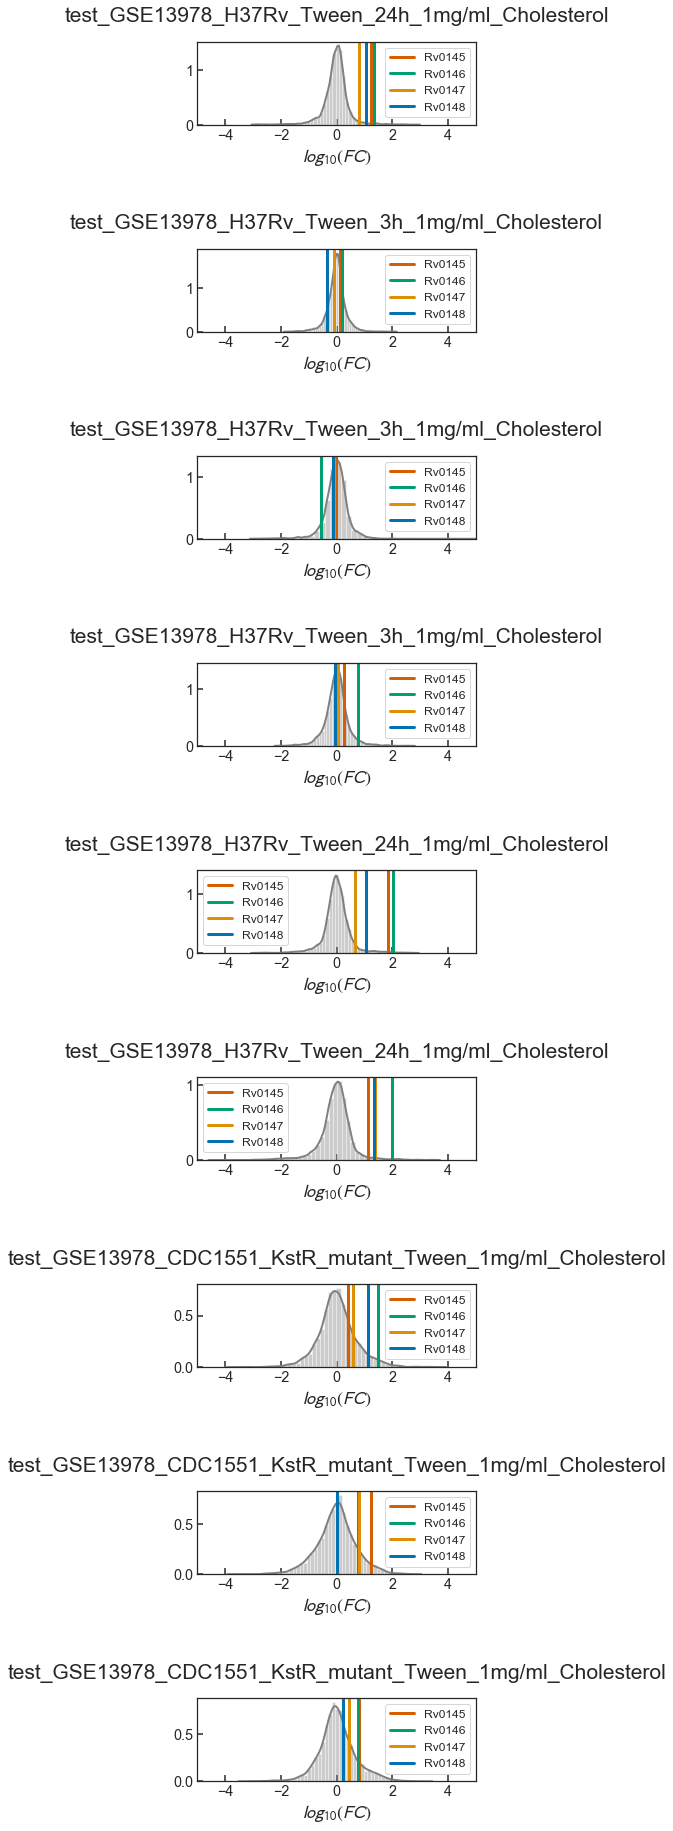

In [296]:
fig = plt.figure(figsize = (5, 32))

fig.subplots_adjust(hspace = 1.5, wspace = 0.3)

for i in range(9):

    ax = fig.add_subplot(9, 1, i+1)
    
    ax = sns.distplot(log_fc_distros[:, i], color = 'grey')
    
    for j in range(len(genes_in_clus)):
        ax.axvline(log_fc[j, i], label = genes_in_clus[j], linewidth = 3, color = pal[j])
        ax.set_title(adata.var.loc[chol_samples_ixs[i]]['Test description'])
    
    ax.set_xlabel(r'$log_{10}(FC)$')
    ax.set_xlim(-5, 5)
    plt.legend()
    
plt.savefig('../figures/log_fc_sdr_cluster.png', dpi = 240, bbox_inches = 'tight')

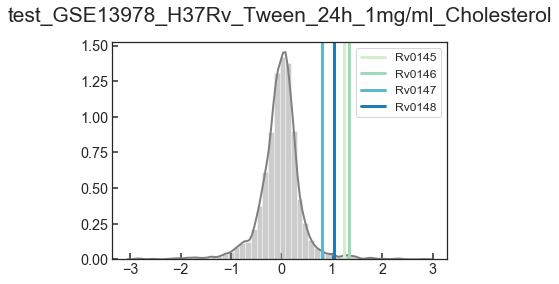

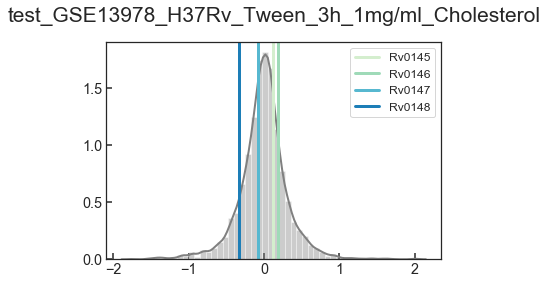

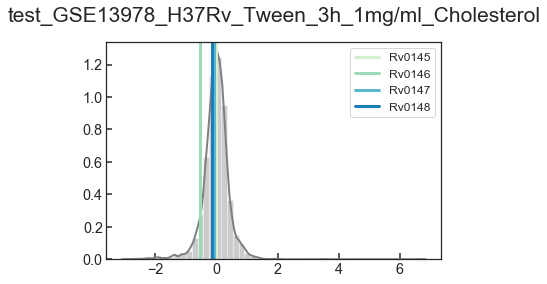

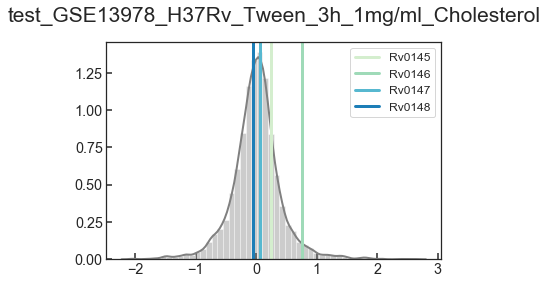

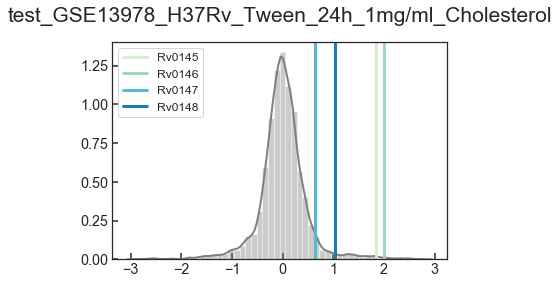

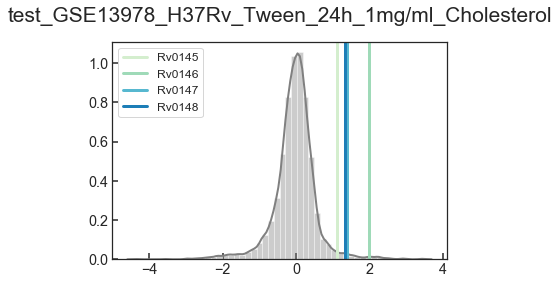

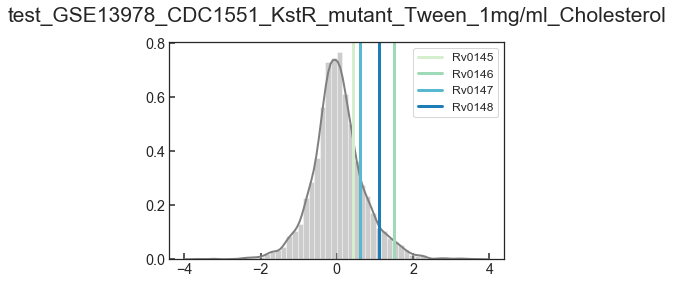

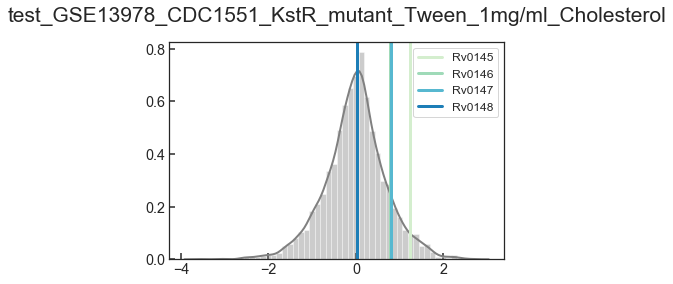

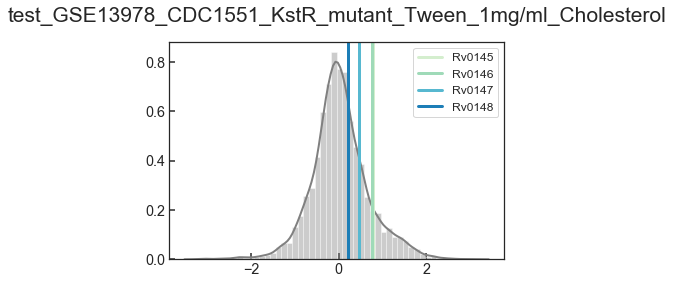

In [203]:
for i in range(9):
        
    plt.figure()
    sns.distplot(log_fc_distros[:, i], color = 'grey') 
    for j in range(4):
        plt.axvline(log_fc[j, i], label = genes_in_clus[j], linewidth = 3, color = pal[j])
        plt.title(adata.var.loc[chol_samples_ixs[i]]['Test description'])
    
    plt.legend()


In [122]:
adata.var.loc[chol_samples_ixs]#[['Test description', 'Reference description']]

,contrast_name,annotation,Test description,Reference description,Experiment_id,Data source,Platform
565,GSM351166.ch2-vs-GSM351166.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_24h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_24h,GSE13978,GEO,GPL4057
566,GSM351164.ch2-vs-GSM351164.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_3h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_3h,GSE13978,GEO,GPL4057
567,GSM351165.ch2-vs-GSM351165.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_3h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_3h,GSE13978,GEO,GPL4057
568,GSM350580.ch2-vs-GSM350580.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_3h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_3h,GSE13978,GEO,GPL4057
569,GSM351167.ch2-vs-GSM351167.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_24h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_24h,GSE13978,GEO,GPL4057
570,GSM351168.ch2-vs-GSM351168.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_24h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_24h,GSE13978,GEO,GPL4057
571,GSM351208.ch2-vs-GSM351208.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_CDC1551_KstR_mutant_Tween_1mg/ml...,ref_GSE13978_CDC1551_Tween_1mg/ml_Cholesterol,GSE13978,GEO,GPL4057
575,GSM351277.ch2-vs-GSM351277.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_CDC1551_KstR_mutant_Tween_1mg/ml...,ref_GSE13978_CDC1551_Tween_1mg/ml_Cholesterol,GSE13978,GEO,GPL4057
576,GSM351278.ch2-vs-GSM351278.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_CDC1551_KstR_mutant_Tween_1mg/ml...,ref_GSE13978_CDC1551_Tween_1mg/ml_Cholesterol,GSE13978,GEO,GPL4057


In [90]:
df_umap[df_umap.Rv_ID.isin(genes_in_clus)]

,Rv_ID,Gene name,Geneid/Contrast_id,is_sdr,func_tuberculist,function_sanger,redox_enzyme,function_redox_,Function,groups,COG,cog_annot,UK_score_4,u1,u2,u3,u1_tn,u2_tn
147,Rv0145,Rv0145,148.0,0.0,lipid metabolism,conserved hypothetical protein,0.0,NaN,NaN,0.0,Q,"Secondary metabolites biosynthesis, transport ...",0.0,3.002994,-0.930617,2.014171,-7.548699,1.744358
148,Rv0146,Rv0146,149.0,0.0,lipid metabolism,conserved hypothetical protein,0.0,NaN,NaN,0.0,Q,"Secondary metabolites biosynthesis, transport ...",0.0,2.934296,-0.917748,1.864310,-7.994748,1.661915
149,Rv0147,Rv0147,150.0,0.0,intermediary metabolism and respiration,aldehyde dehydrogenase,1.0,Function unknown; probably involved in cellula...,Aldehyde dehydrogenase (EC 1.2.1.3),0.0,C,Energy production and conversion,2.0,3.031332,-0.948184,2.058300,-7.975739,1.800016
150,Rv0148,Rv0148,151.0,1.0,intermediary metabolism and respiration,steroid dehydrogenase,1.0,Function unknown; possibly involved in cellula...,Short-chain dehydrogenase/reductase SDR,4.0,IQR,NaN,3.0,3.064811,-0.945184,1.973145,-8.098337,1.528490


In [244]:
df_umap[df_umap.Rv_ID.isin(genes_in_clus + ['Rv0144'])].hvplot.scatter(
    x = 'u1', 
    y = 'u2', 
    c = 'is_sdr', 
    hover_cols = ['gene_name', 'Function', 'LocusTag', 'category', 'Rv_ID'],
    cmap = 'Accent', 
    alpha = 0.6,
    padding = 0.1, 
    size = 25,
    clabel = 'sdr', 
    width = 500,
    height = 300
)

:Scatter   [u1]   (u2,is_sdr,Function,Rv_ID)

Finally let's export the anndata in the `h5ad` format.

In [240]:
adata

AnnData object with n_obs × n_vars = 4016 × 1098
    obs: 'index', 'Rv_ID', 'Gene name', 'Geneid/Contrast_id', 'is_sdr', 'func_tuberculist', 'function_sanger', 'redox_enzyme', 'function_redox_', 'Function', 'groups', 'COG', 'cog_annot', 'UK_score_4', 'u1', 'u2', 'u3', 'u1_tn', 'u2_tn'
    var: 'contrast_name', 'annotation', 'Test description', 'Reference description', 'Experiment_id', 'Data source', 'Platform'

In [241]:
path

'~/Documents/bioinfo/data/tb/'

In [242]:
adata.obs.head()

,index,Rv_ID,Gene name,Geneid/Contrast_id,is_sdr,func_tuberculist,function_sanger,redox_enzyme,function_redox_,Function,groups,COG,cog_annot,UK_score_4,u1,u2,u3,u1_tn,u2_tn
0,0,Rv0001,dnaA,1.0,0.0,information pathways,chromosomal replication initiator protein,0.0,NaN,Chromosomal replication initiator protein DnaA,0.0,L,"Replication, recombination and repair",0.0,0.931896,0.631473,0.299345,-4.858897,1.413937
1,1,Rv0002,dnaN,2.0,0.0,information pathways,"DNA polymerase III, [beta] subunit",0.0,NaN,DNA polymerase III beta subunit (EC 2.7.7.7),0.0,L,"Replication, recombination and repair",0.0,1.695993,0.697901,1.379740,-6.833129,1.925143
2,2,Rv0003,recF,3.0,0.0,information pathways,DNA replication and SOS induction,0.0,NaN,DNA recombination and repair protein RecF,0.0,L,"Replication, recombination and repair",0.0,2.145068,0.298384,1.759979,10.352838,-0.587461
3,3,Rv0004,Rv0004,4.0,0.0,conserved hypotheticals,conserved hypothetical protein,0.0,NaN,"Zn-ribbon-containing, possibly RNA-binding pro...",0.0,R,General function prediction only,0.0,2.293828,0.307575,0.833794,-6.510271,0.908762
4,4,Rv0005,gyrB,5.0,0.0,information pathways,DNA gyrase subunit B,0.0,NaN,DNA gyrase subunit B (EC 5.99.1.3),0.0,L,"Replication, recombination and repair",0.0,0.941413,0.684316,0.302338,-7.039450,1.838185


In [243]:
adata.write_h5ad('../data/tb_adata_v0.h5ad')

/Users/manoloflores/anaconda3/envs/maxwell/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'func_tuberculist' as categorical
... storing 'function_sanger' as categorical
... storing 'function_redox_' as categorical
... storing 'Function' as categorical
... storing 'COG' as categorical
... storing 'cog_annot' as categorical
... storing 'annotation' as categorical
... storing 'Test description' as categorical
... storing 'Reference description' as categorical
... storing 'Experiment_id' as categorical
... storing 'Data source' as categorical
... storing 'Platform' as categorical
